In [1]:
!pip install fasteda

In [2]:
!pip install datacleaner

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
import seaborn as sns
from scipy.stats import spearmanr

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from fasteda import fast_eda
from datacleaner import autoclean
import scipy
import scipy.stats as stats

from collections import Counter
from sklearn.model_selection import train_test_split
import random

In [4]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0


In [5]:
# Get the number of rows (samples) and columns (features)
num_samples, num_features = data.shape

# Print the number of samples and features
print(f"Number of Samples (Transactions): {num_samples}")
print(f"Number of Features (Attributes): {num_features}")

Number of Samples (Transactions): 284807
Number of Features (Attributes): 31


In [6]:
data.info

<bound method DataFrame.info of              Time      V1     V2     V3     V4     V5     V6     V7     V8  \
0           0.000  -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099   
1           0.000   1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085   
2           1.000  -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248   
3           1.000  -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377   
4           2.000  -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271   
...           ...     ...    ...    ...    ...    ...    ...    ...    ...   
284802 172786.000 -11.881 10.072 -9.835 -2.067 -5.364 -2.607 -4.918  7.305   
284803 172787.000  -0.733 -0.055  2.035 -0.739  0.868  1.058  0.024  0.295   
284804 172788.000   1.920 -0.301 -3.250 -0.558  2.631  3.031 -0.297  0.708   
284805 172788.000  -0.240  0.530  0.703  0.690 -0.378  0.624 -0.686  0.679   
284806 172792.000  -0.533 -0.190  0.703 -0.506 -0.013 -0.650  1.577 -0.415   

           V9    V10    V11    

In [7]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [8]:
data.info

<bound method DataFrame.info of              Time      V1     V2     V3     V4     V5     V6     V7     V8  \
0           0.000  -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099   
1           0.000   1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085   
2           1.000  -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248   
3           1.000  -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377   
4           2.000  -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271   
...           ...     ...    ...    ...    ...    ...    ...    ...    ...   
284802 172786.000 -11.881 10.072 -9.835 -2.067 -5.364 -2.607 -4.918  7.305   
284803 172787.000  -0.733 -0.055  2.035 -0.739  0.868  1.058  0.024  0.295   
284804 172788.000   1.920 -0.301 -3.250 -0.558  2.631  3.031 -0.297  0.708   
284805 172788.000  -0.240  0.530  0.703  0.690 -0.378  0.624 -0.686  0.679   
284806 172792.000  -0.533 -0.190  0.703 -0.506 -0.013 -0.650  1.577 -0.415   

           V9    V10    V11    

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

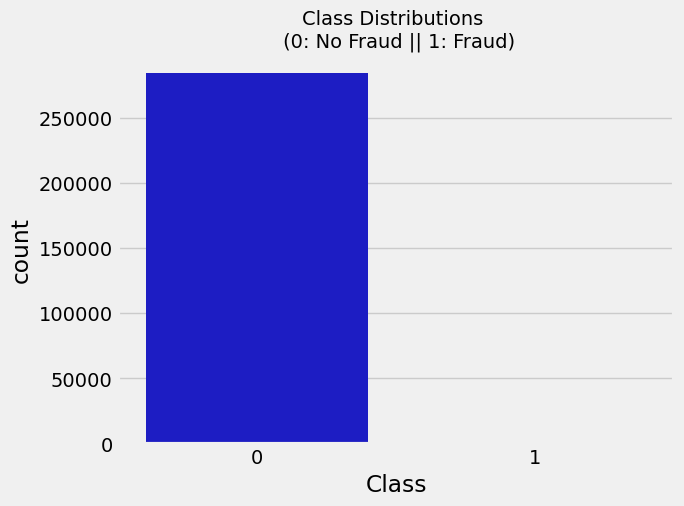

In [9]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

1)Transaction Class Distribution: The dataset is highly imbalanced with a significantly larger number of non-fraudulent transactions (Class 0) compared to fraudulent transactions (Class 1).

In [10]:
data[data.columns].isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Descriptive Statistics for Numerical Features

In [11]:
# Select only the numerical features (Time, Transaction Amount, V1 to V28)
numerical_features = data[['Time', 'Amount'] + ['V' + str(i) for i in range(1, 29)]]

# Calculate statistics for each numerical feature
statistics = numerical_features.describe()

# Calculate percentiles separately
percentiles = numerical_features.quantile([0.25, 0.50, 0.75])

# Print the statistics and percentiles
print("Basic Statistics:")
print(statistics)

print("\nPercentiles:")
print(percentiles)

# Calculate statistics for 'Class' column (fraud or not fraud)
class_statistics = data['Class'].value_counts()

# Print class distribution
print("\nClass Distribution:")
print(class_statistics)


Basic Statistics:
            Time     Amount         V1         V2         V3         V4  \
count 284807.000 284807.000 284807.000 284807.000 284807.000 284807.000   
mean   94813.860     88.350      0.000      0.000     -0.000      0.000   
std    47488.146    250.120      1.959      1.651      1.516      1.416   
min        0.000      0.000    -56.408    -72.716    -48.326     -5.683   
25%    54201.500      5.600     -0.920     -0.599     -0.890     -0.849   
50%    84692.000     22.000      0.018      0.065      0.180     -0.020   
75%   139320.500     77.165      1.316      0.804      1.027      0.743   
max   172792.000  25691.160      2.455     22.058      9.383     16.875   

              V5         V6         V7         V8         V9        V10  \
count 284807.000 284807.000 284807.000 284807.000 284807.000 284807.000   
mean      -0.000      0.000     -0.000     -0.000     -0.000      0.000   
std        1.380      1.332      1.237      1.194      1.099      1.089   
min   

# Correlation Analysis

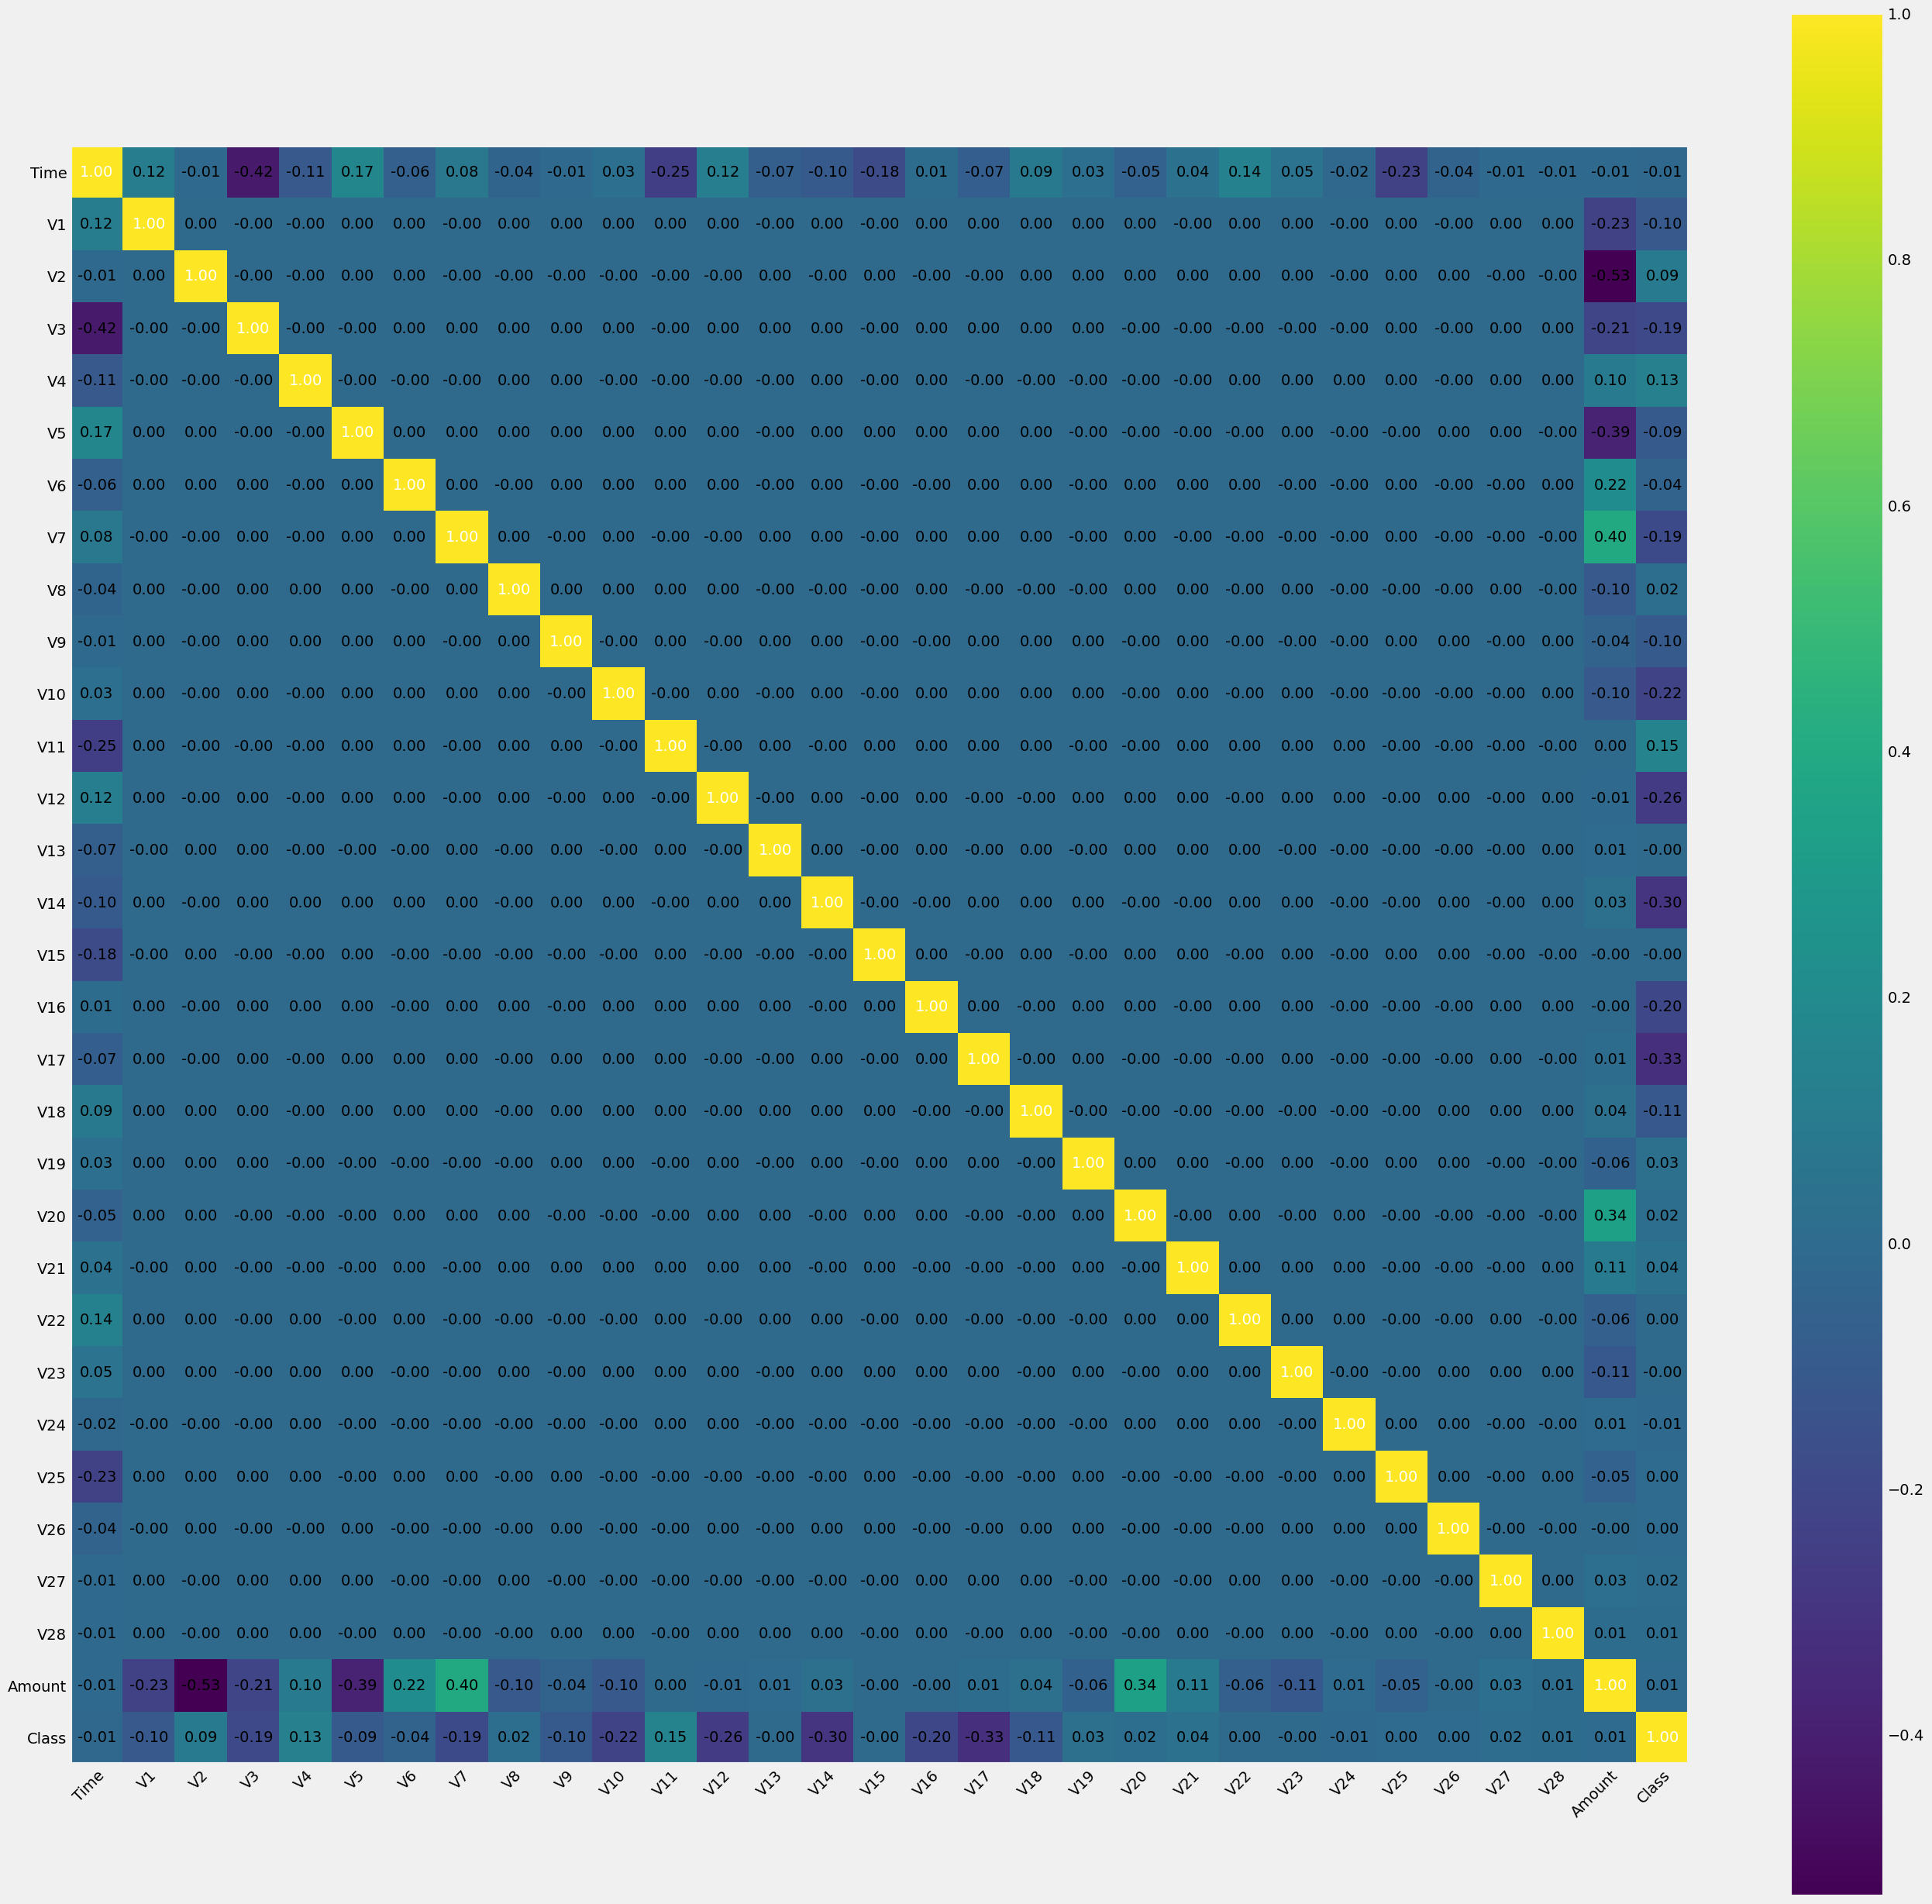

In [12]:
cols = data.columns     # List of colmuns of dataframe Arrival_ddelay
cm = np.corrcoef(data[cols].values.T) 
hm = heatmap(cm, figsize=(30,30), row_names=cols, column_names=cols)  # Represent correlation by a heat map
plt.show()

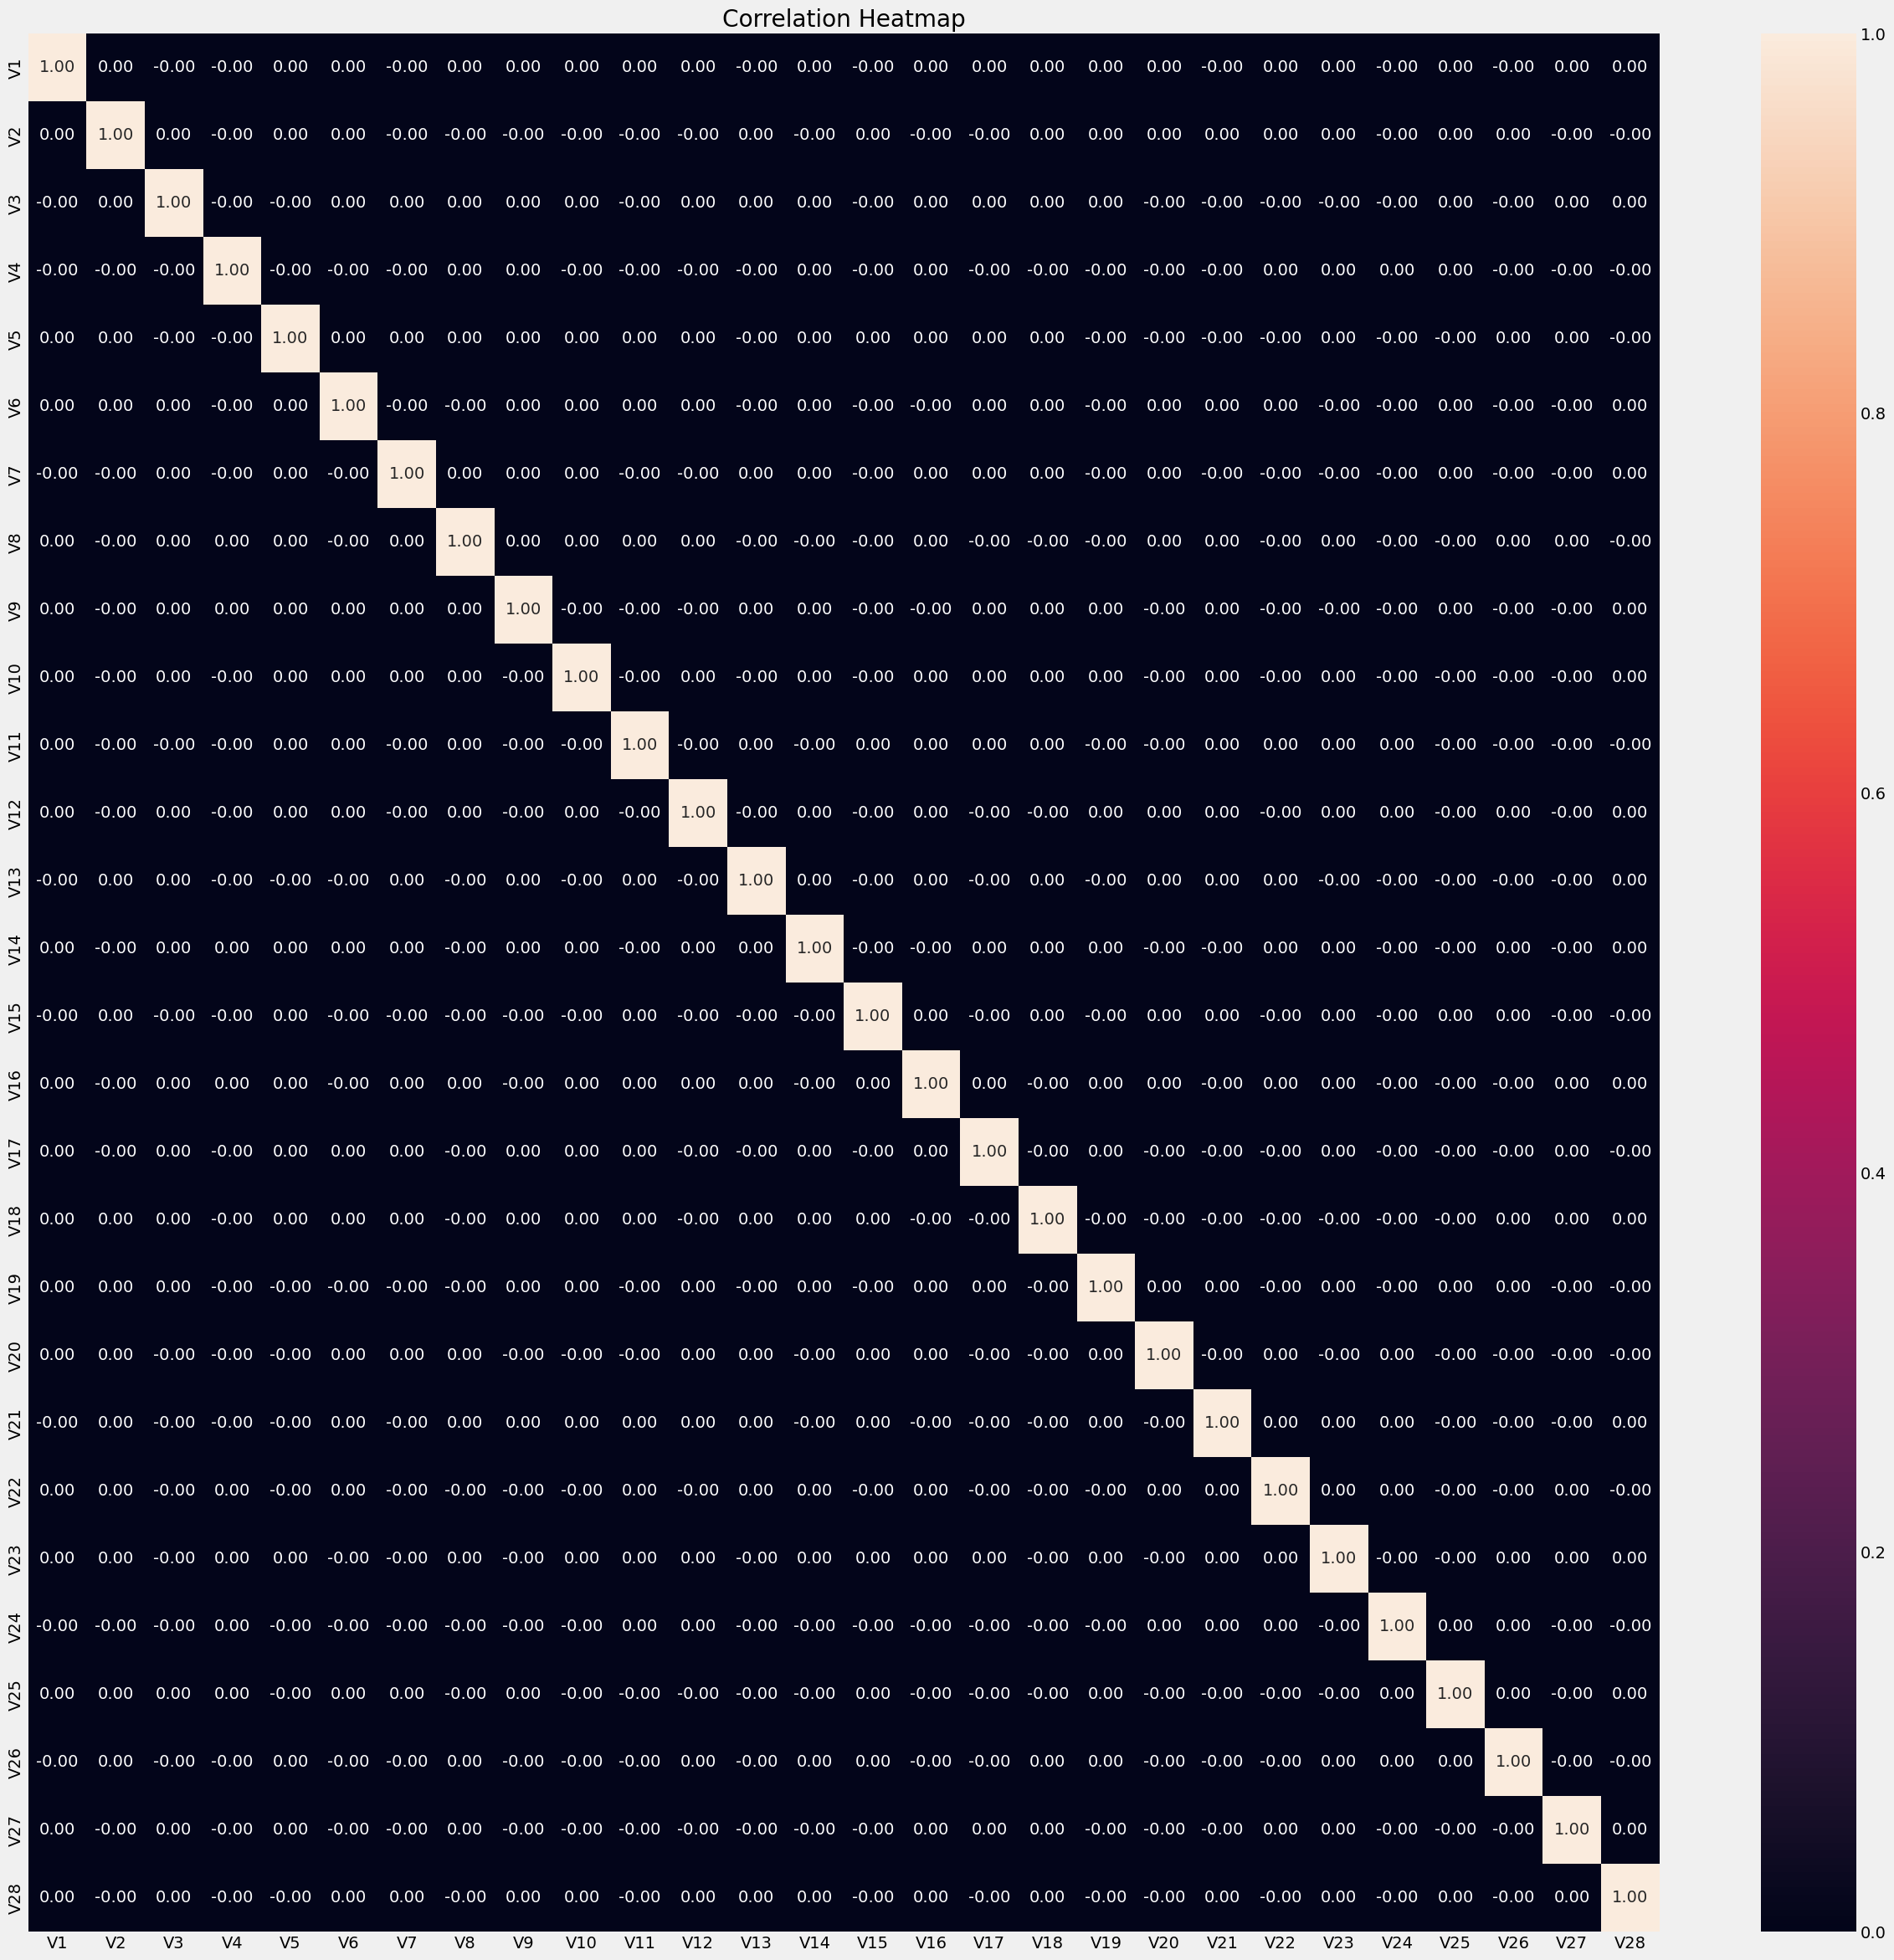

In [13]:
selected_cols = data.iloc[:, 1:29]  # Assuming you want columns 1 to 28

# Calculate the correlation matrix
cm = np.corrcoef(selected_cols, rowvar=False)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(28, 28))
hm = sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=selected_cols.columns, yticklabels=selected_cols.columns)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
cols = data.columns     # List of colmuns of dataframe boston_df
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Spearman Correlation

In [15]:
# Calculate Spearman correlation coefficient between 'Class' and each feature 

for col in cols[:-1]:
    rho, p = spearmanr(data[col].values, data['Class'].values)
    print('Spearman correlation between Class and %s is %s' %(col, round(rho, 4)))

Spearman correlation between Class and Time is -0.0117
Spearman correlation between Class and V1 is -0.0424
Spearman correlation between Class and V2 is 0.0511
Spearman correlation between Class and V3 is -0.0593
Spearman correlation between Class and V4 is 0.063
Spearman correlation between Class and V5 is -0.0301
Spearman correlation between Class and V6 is -0.0384
Spearman correlation between Class and V7 is -0.0483
Spearman correlation between Class and V8 is 0.0227
Spearman correlation between Class and V9 is -0.0495
Spearman correlation between Class and V10 is -0.0596
Spearman correlation between Class and V11 is 0.0601
Spearman correlation between Class and V12 is -0.0629
Spearman correlation between Class and V13 is -0.0037
Spearman correlation between Class and V14 is -0.0646
Spearman correlation between Class and V15 is -0.0028
Spearman correlation between Class and V16 is -0.0499
Spearman correlation between Class and V17 is -0.0443
Spearman correlation between Class and V1

In [38]:
# Calculate Spearman correlation coefficient between 'Class' and each feature
correlation_values = []

for col in data.columns[:-1]:  # Exclude the 'Class' column
    rho, p = spearmanr(data[col], data['Class'])
    correlation_values.append((col, rho))

# Sort the correlation values in descending order
correlation_values.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the sorted correlation values
for col, rho in correlation_values:
    print(f'Spearman correlation between Class and {col} is {round(rho, 4)}')


Spearman correlation between Class and Class is 1.0
Spearman correlation between Class and V14 is -0.0646
Spearman correlation between Class and V4 is 0.063
Spearman correlation between Class and V12 is -0.0629
Spearman correlation between Class and V11 is 0.0601
Spearman correlation between Class and V10 is -0.0596
Spearman correlation between Class and V3 is -0.0593
Spearman correlation between Class and V2 is 0.0511
Spearman correlation between Class and V16 is -0.0499
Spearman correlation between Class and V9 is -0.0495
Spearman correlation between Class and V7 is -0.0483
Spearman correlation between Class and V17 is -0.0443
Spearman correlation between Class and V1 is -0.0424
Spearman correlation between Class and V6 is -0.0384
Spearman correlation between Class and V21 is 0.0354
Spearman correlation between Class and V18 is -0.0349
Spearman correlation between Class and V5 is -0.0301
Spearman correlation between Class and V27 is 0.0283
Spearman correlation between Class and V8 is

# Range of Amount where Fraud percentage is Observed

In [16]:
# Define a list of threshold values to test
thresholds = [100, 200, 500, 1000, 2000, 5000]

# Create an empty DataFrame to store results
threshold_results = pd.DataFrame(columns=['Threshold', 'Fraud Rate'])

# Iterate through each threshold value
for threshold in thresholds:
    # Create a binary column indicating whether the transaction amount exceeds the threshold
    data['Above_Threshold'] = (data['Amount'] > threshold).astype(int)
    
    # Calculate the fraud rate for transactions above the threshold
    fraud_rate = data[data['Above_Threshold'] == 1]['Class'].mean()
    
    # Append the threshold and fraud rate to the results DataFrame
    threshold_results = threshold_results.append({'Threshold': threshold, 'Fraud Rate': fraud_rate}, ignore_index=True)

# Print the results
print(threshold_results)

   Threshold  Fraud Rate
0    100.000       0.002
1    200.000       0.003
2    500.000       0.004
3   1000.000       0.003
4   2000.000       0.001
5   5000.000       0.000


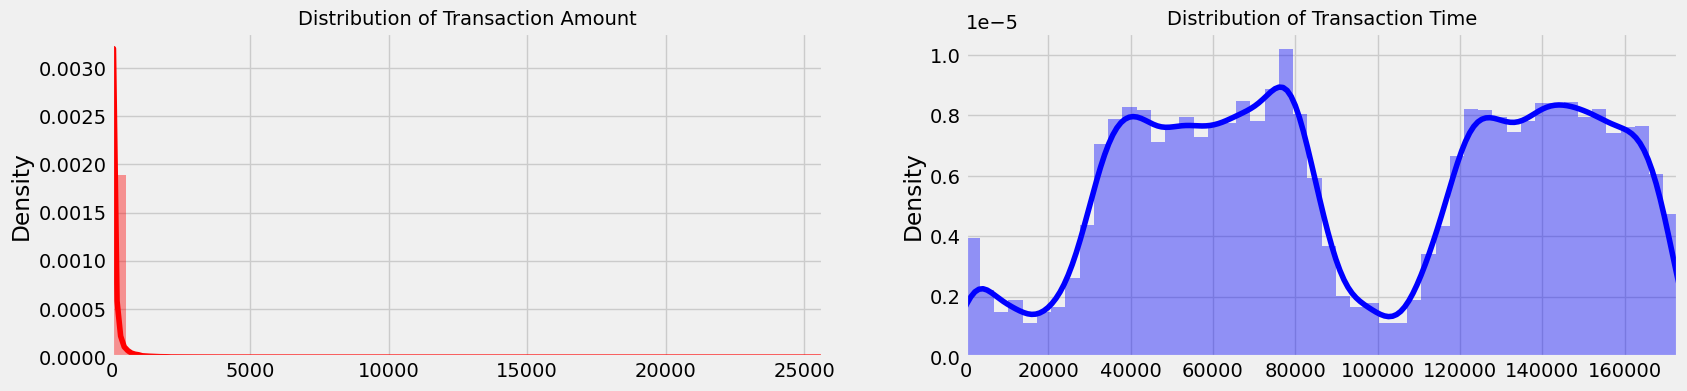

In [17]:

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

1)Transaction Amount Distribution: The majority of transactions are small amounts, with very few transactions of large amounts. This distribution is highly right-skewed.

2)Transaction Time Distribution: The transactions are evenly distributed over time, but there seem to be certain time frames where the transaction frequency is higher.

# Temporal distribution of Fraud and Not Fraud

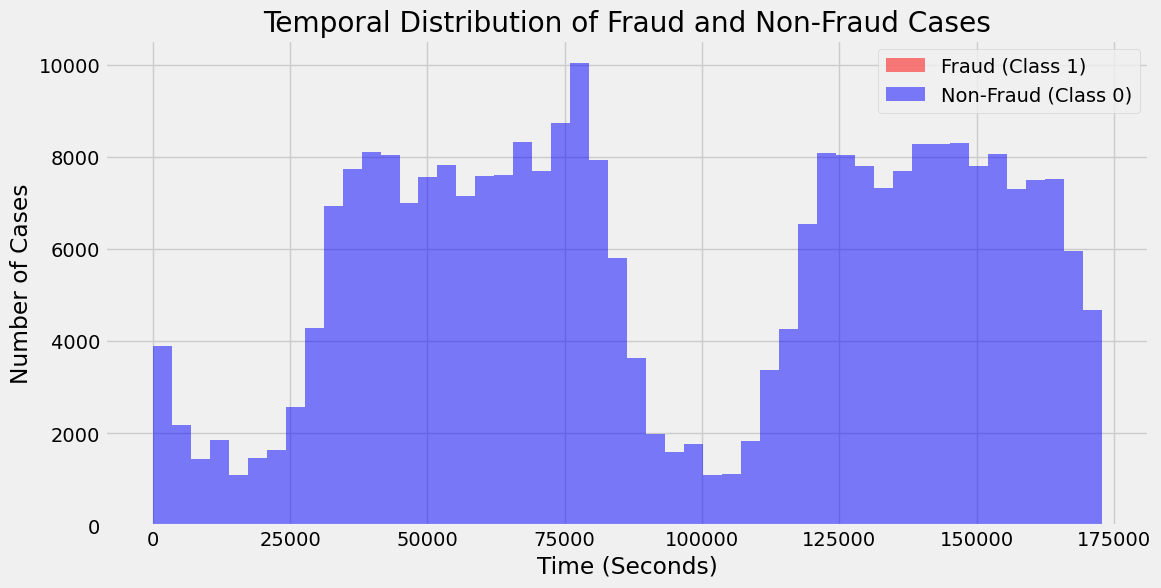

In [18]:
# Filter the data for fraud (Class 1) and non-fraud (Class 0) cases
fraud_cases = data[data['Class'] == 1]
non_fraud_cases = data[data['Class'] == 0]

# Create a histogram to visualize the temporal distribution of fraud and non-fraud cases
plt.figure(figsize=(12, 6))
plt.hist(fraud_cases['Time'], bins=50, color='red', alpha=0.5, label='Fraud (Class 1)')
plt.hist(non_fraud_cases['Time'], bins=50, color='blue', alpha=0.5, label='Non-Fraud (Class 0)')
plt.title('Temporal Distribution of Fraud and Non-Fraud Cases')
plt.xlabel('Time (Seconds)')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


# Outlier Analysis

In [19]:
# Define the list of features to use
feature_list = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
               'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
               'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

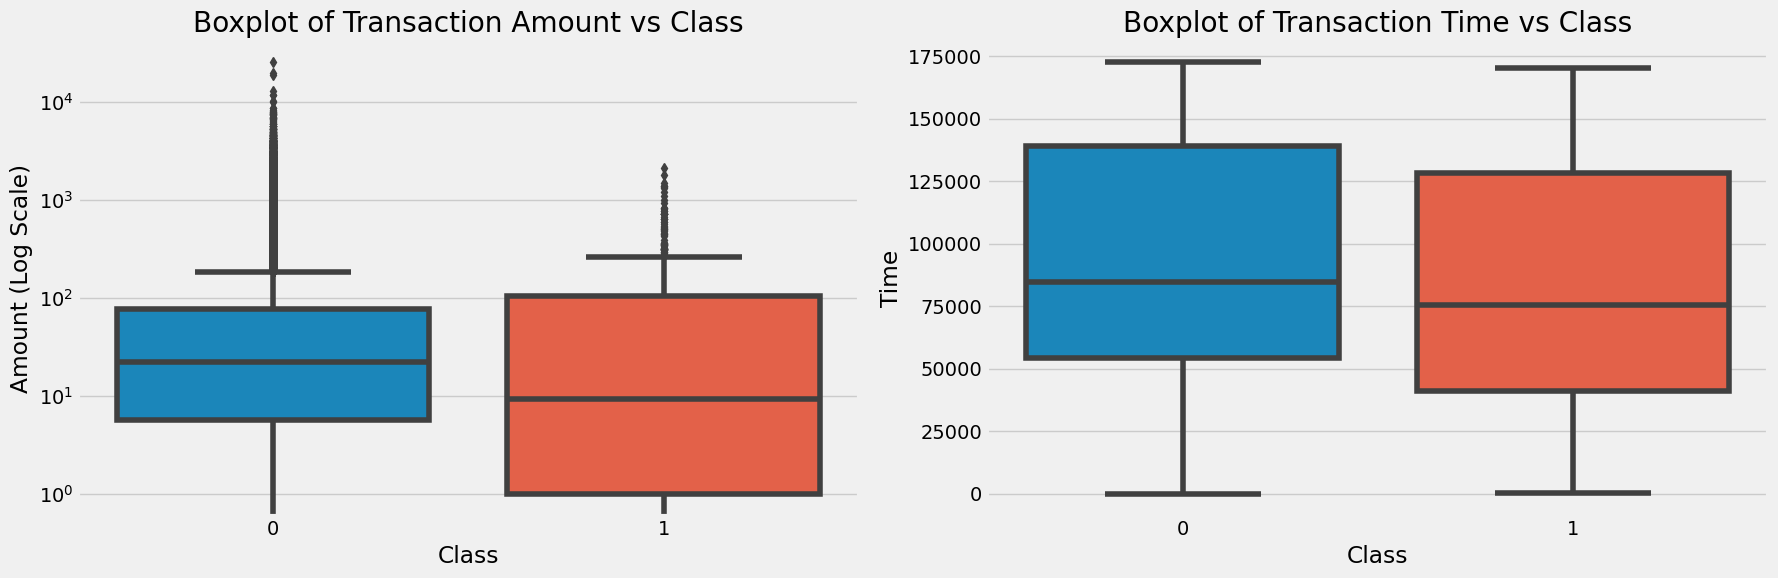

In [20]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot for 'Amount'
sns.boxplot(x='Class', y='Amount', data=data, ax=axes[0])
axes[0].set_title('Boxplot of Transaction Amount vs Class')
axes[0].set_yscale('log')  # Using a log scale due to wide range in 'Amount'
axes[0].set_ylabel('Amount (Log Scale)')
axes[0].set_xlabel('Class')

# Boxplot for 'Time'
sns.boxplot(x='Class', y='Time', data=data, ax=axes[1])
axes[1].set_title('Boxplot of Transaction Time vs Class')
axes[1].set_ylabel('Time')
axes[1].set_xlabel('Class')

plt.tight_layout()
plt.show()

1)Boxplot of Transaction Amount vs. Class:

For both fraudulent and non-fraudulent transactions, there are several outliers in the Amount variable.
Fraudulent transactions (Class=1) tend to have a lower median transaction amount compared to non-fraudulent transactions, but there is a wide range of amounts in the fraudulent transactions as well.

2)Boxplot of Transaction Time vs. Class:

There doesn't appear to be a significant difference in transaction times between fraudulent and non-fraudulent transactions.
There are no noticeable outliers in the Time variable for either class.

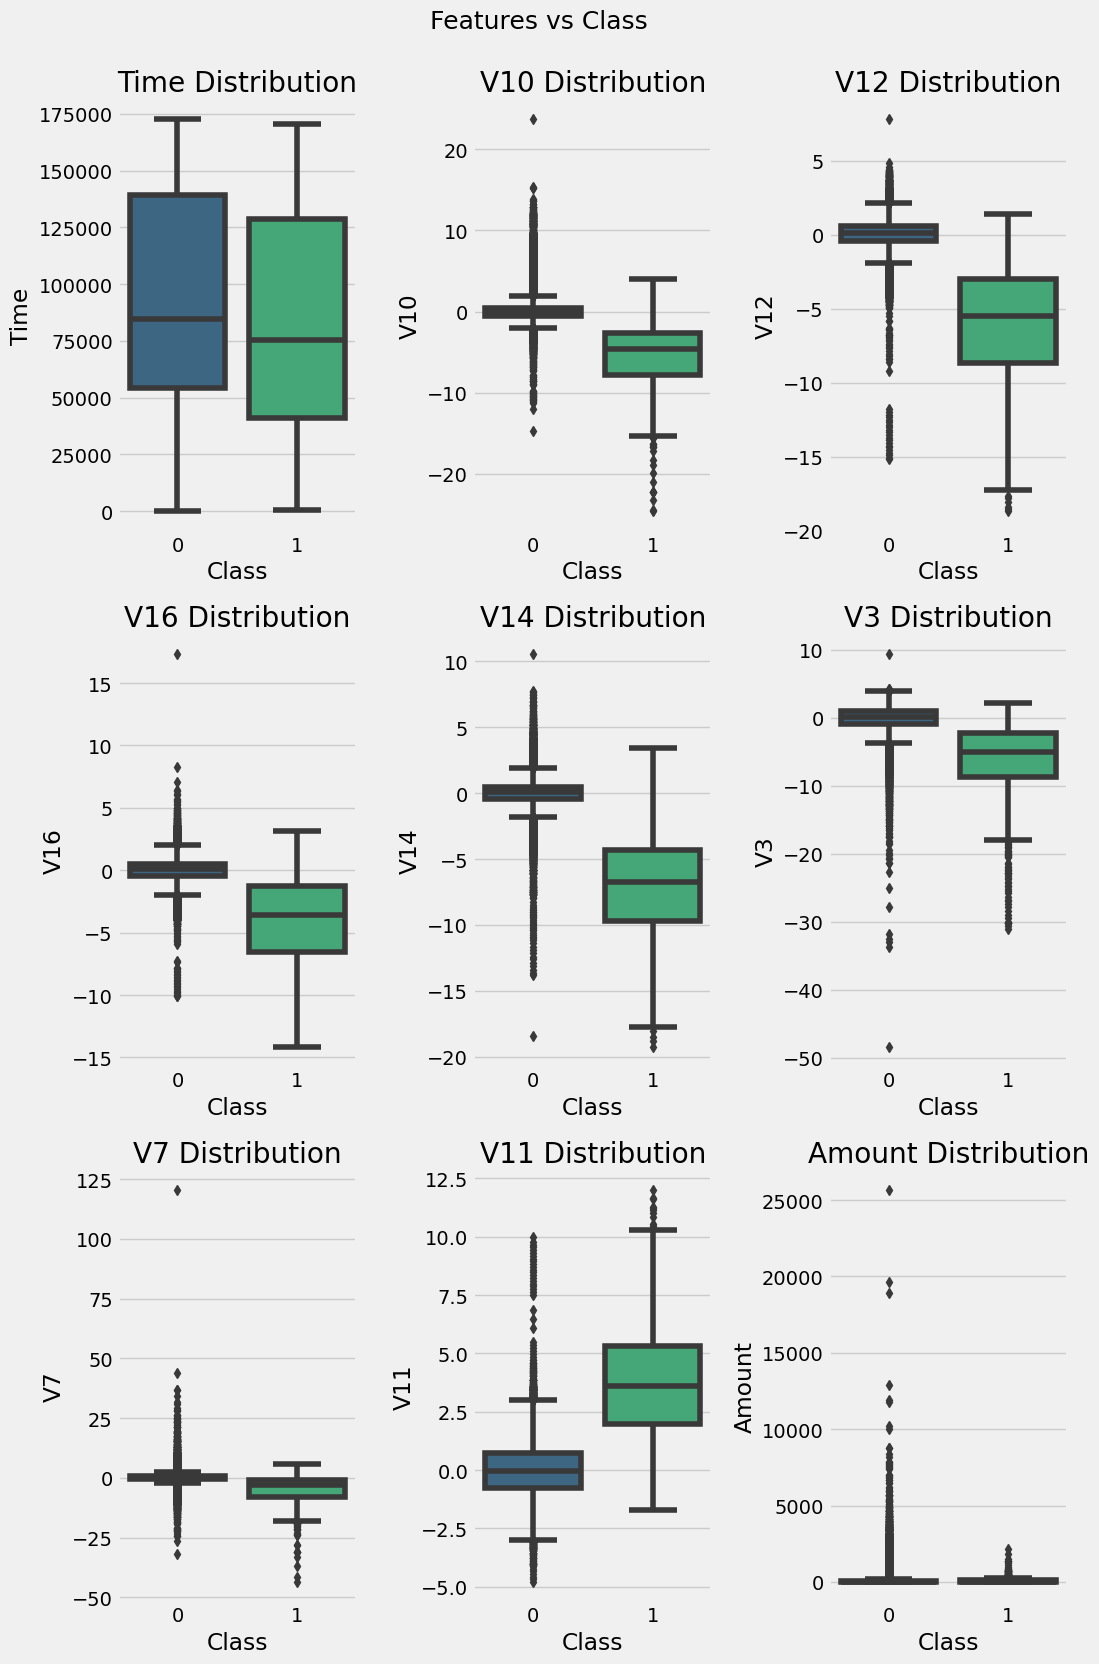

In [21]:
# Create subplots for visualizing features vs. Class
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 17))
fig.suptitle('Features vs Class\n', size=18)

# Define the features you want to visualize
features_to_visualize = ['Time', 'V10', 'V12', 'V16', 'V14', 'V3', 'V7', 'V11',  'Amount']

# Create boxplots for each feature
for i, feature in enumerate(features_to_visualize):
    row, col = i // 3, i % 3  # Calculate the row and column for the subplot

    # Create a boxplot for the feature grouped by 'Class' using the viridis palette
    sns.boxplot(ax=axes[row, col], data=data, x='Class', y=feature, palette='viridis')
    axes[row, col].set_title(f"{feature} Distribution")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# Inter Quartile Range

In [22]:

def IQR_method(df, n, features):
    """
    Identify outliers in a DataFrame using the Tukey IQR method.

    Parameters:
    df (DataFrame): The input DataFrame.
    n (int): The minimum number of outliers in an observation to be considered.
    features (list): List of feature column names to analyze for outliers.

    Returns:
    list: A list of indices corresponding to observations with more than 'n' outliers.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        # Append the list of outliers
        outlier_list.extend(outlier_list_column)

    # Count occurrences of each outlier index
    outlier_count = Counter(outlier_list)

    # Select observations containing more than 'n' outliers
    multiple_outliers = [k for k, v in outlier_count.items() if v > n]

    # Calculate the total number of outliers
    total_outliers = len(multiple_outliers)
    
    print('Total number of outliers is:', total_outliers)

    return multiple_outliers

In [23]:
# Detecting outliers using the IQR_method function with a threshold of 1 outlier per observation
Outliers_IQR = IQR_method(data, 1, feature_list)

# Dropping outliers from the DataFrame
df_out = data.drop(Outliers_IQR, axis=0).reset_index(drop=True)

Total number of outliers is: 81430


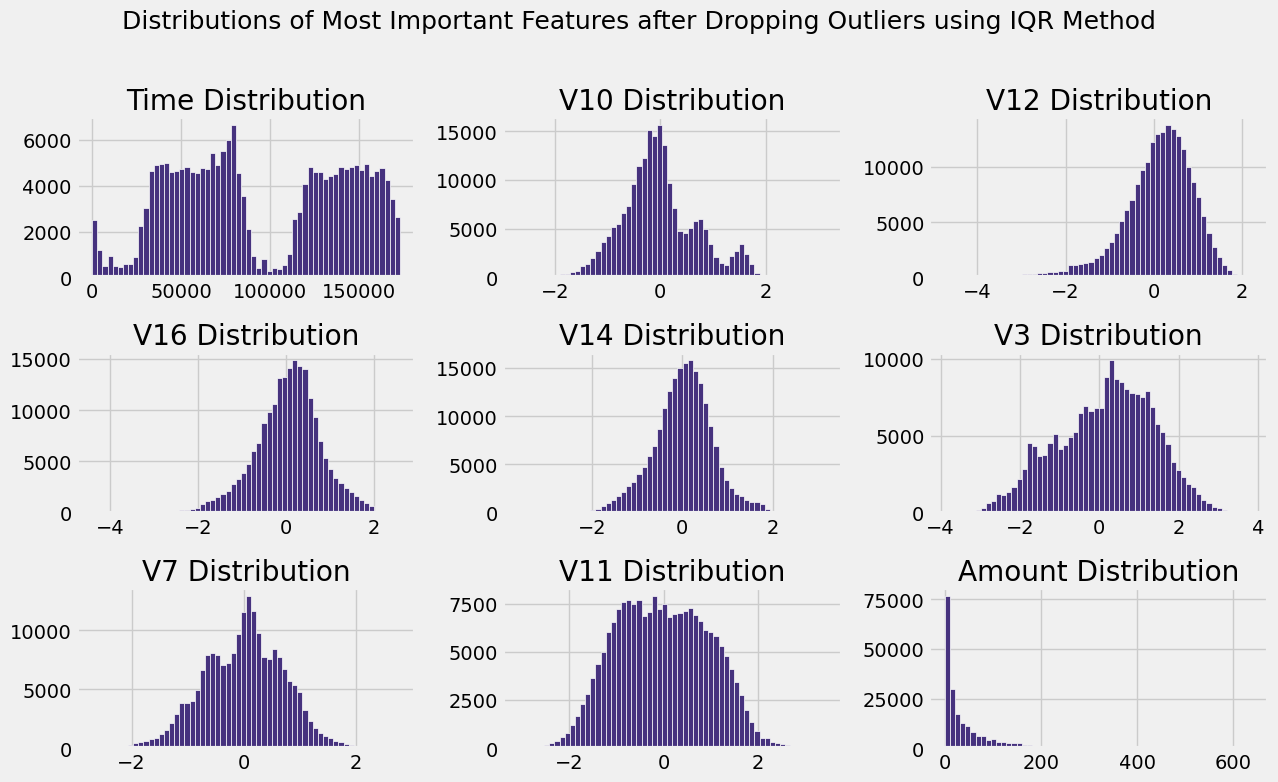

In [24]:
# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Create subplots for visualizing the distributions of important features after outlier removal
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
fig.suptitle('Distributions of Most Important Features after Dropping Outliers using IQR Method\n', size=18)

# Plot histograms for each feature
axes[0, 0].hist(df_out['Time'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 0].set_title("Time Distribution")

axes[0, 1].hist(df_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 1].set_title("V10 Distribution")

axes[0, 2].hist(df_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0, 2].set_title("V12 Distribution")

axes[1, 0].hist(df_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 0].set_title("V16 Distribution")

axes[1, 1].hist(df_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 1].set_title("V14 Distribution")

axes[1, 2].hist(df_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1, 2].set_title("V3 Distribution")

axes[2, 0].hist(df_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 0].set_title("V7 Distribution")

axes[2, 1].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 1].set_title("V11 Distribution")

axes[2, 2].hist(df_out['Amount'], bins=60, linewidth=0.5, edgecolor="white")
axes[2, 2].set_title("Amount Distribution")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

### 5) HYPOTHESIS TESTING 

Given the observed difference in transaction amounts between fraudulent and non-fraudulent transactions, we might be interested in testing whether this difference is statistically significant.

We can perform a t-test to test the null hypothesis that the means of the Amount variable for the two classes (fraudulent and non-fraudulent) are equal against the alternative hypothesis that they are not equal.

In [25]:
# Separating the 'Amount' for fraudulent and non-fraudulent transactions
amount_fraud = data[data['Class'] == 1]['Amount']
amount_non_fraud = data[data['Class'] == 0]['Amount']

# Performing the t-test
t_stat, p_value = stats.ttest_ind(amount_fraud, amount_non_fraud, equal_var=False)

# Mean values for both classes
mean_fraud = amount_fraud.mean()
mean_non_fraud = amount_non_fraud.mean()

mean_fraud, mean_non_fraud, t_stat, p_value

(122.21132113821133,
 88.29102242225574,
 2.928789530856467,
 0.003560518851710299)

Conclusion:
The hypothesis test indicates that the mean transaction amounts are significantly different between fraudulent and non-fraudulent transactions, providing a potential characteristic to consider in predictive modeling.

## Feature Importance using Random Forest

In [26]:
X = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
               'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
               'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount' ]].to_numpy()    # Features
y = data['Class'].to_numpy()          # Target 

In [27]:
# Breaking the data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [28]:
# Constructing a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=3000, max_depth=6, max_leaf_nodes=8, random_state=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=8, n_estimators=3000,
                       random_state=3)

V12: 0.13263837641994297
V17: 0.1304854149987149
V14: 0.1166158570433976
V10: 0.10109423949788464
V11: 0.07133965755041119
V16: 0.06441765527094113
V9: 0.042925012019120336
V18: 0.031173303283847792
V4: 0.028653833901342636
V7: 0.02032891381963928
V21: 0.019564839089906978
V26: 0.01797438042679864
V3: 0.01766301491836982
V20: 0.017488997298855488
V1: 0.015225178774450327
V6: 0.013607460452312694
V5: 0.013403227343917048
V27: 0.01307372299297795
V8: 0.012477915641357602
V15: 0.012407834391762672
V2: 0.012214416269931293
Amount: 0.012110717900923117
Time: 0.01202482997381779
V28: 0.01148921020631083
V19: 0.011411334973236795
V24: 0.010838631434156025
V22: 0.010793177321745994
V13: 0.00936425714219113
V25: 0.008626747134249348
V23: 0.00847969850466992
Above_Threshold: 8.814400281621287e-05


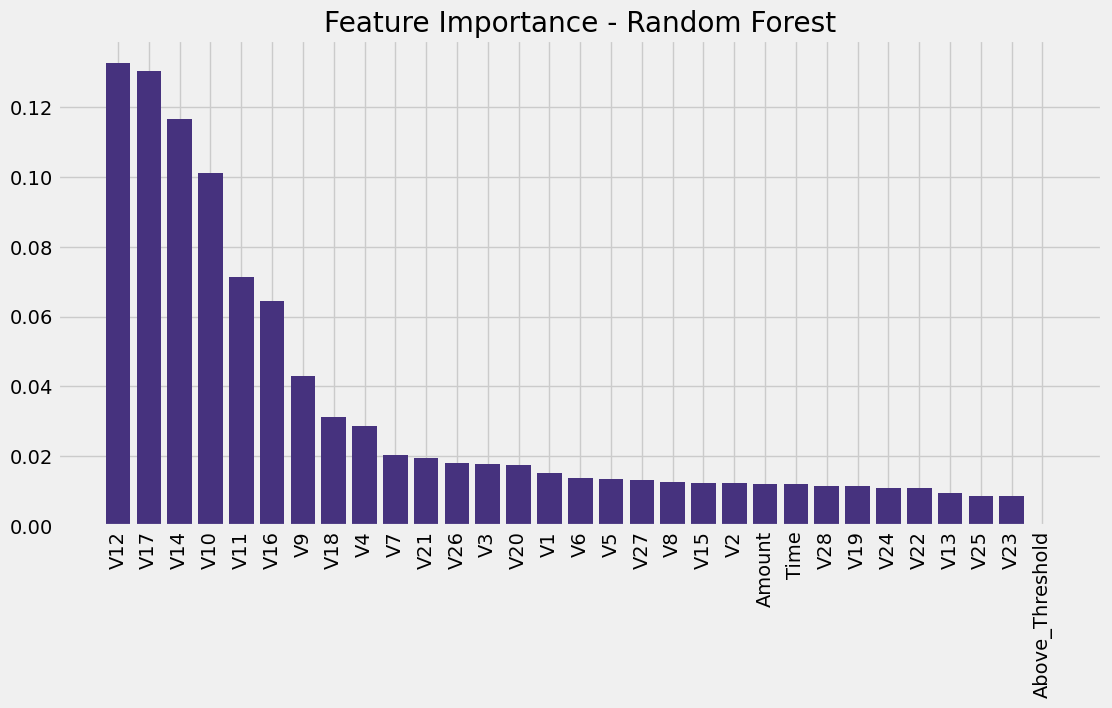

In [37]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on your data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort the features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importance scores
for i, feature_index in enumerate(sorted_indices):
    print(f"{X.columns[feature_index]}: {feature_importances[feature_index]}")

# Plot feature importance scores
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in sorted_indices], rotation=90)
plt.show()

# Calculating the feature importance
feature_importance = rf_clf.feature_importances_
feature_importance = 100.0 * (feature_importance / np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")

# Modify this line to display feature names excluding the first two and the last columns
# Modify this line to display all feature names
plt.yticks(pos, data.columns)


plt.show()


# Balancing the data

OVERSAMPLING data as we know that the data set is unbalanced ,

Oversampling is a common technique to handle imbalanced datasets, especially when the minority class (in this case, fraudulent transactions) is underrepresented.

One of the widely used oversampling methods is SMOTE (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic samples in the feature space. Rather than replicating the minority class records, SMOTE creates new synthetic samples that are quite similar to the existing observations in the minority class. SMOTE can help improve the classifier’s performance on an imbalanced dataset.

In [ ]:
# Separating the minority and majority class samples
data_minority = data[data['Class'] == 1]
data_majority = data[data['Class'] == 0]

# Oversampling the minority class
data_minority_oversampled = data_minority.sample(n=len(data_majority), replace=True, random_state=42)

# Concatenating the majority class samples and oversampled minority class samples
data_oversampled = pd.concat([data_majority, data_minority_oversampled], axis=0)

# Visualizing the distribution after basic oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data_oversampled, palette='viridis')
plt.title('Class Distribution After Basic Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.text(0.25, len(data_majority)//2, f'Non-Fraud: {len(data_majority)}', fontsize=12, ha='center')
plt.text(0.75, len(data_majority)//2, f'Fraud: {len(data_majority)}', fontsize=12, ha='center')
plt.show()

# Returning the shape of the original and oversampled data
data.shape, data_oversampled.shape


The plot illustrates the class distribution after basic oversampling. Now, both classes (fraudulent and non-fraudulent transactions) have equal representation in the dataset, thus mitigating the imbalance.

The original dataset had 284,807 samples.
The oversampled dataset contains 568,630 samples, with equal representation for both classes.

This balanced dataset can potentially provide a better foundation for training machine learning models since it allows the model to have sufficient data to learn the characteristics of both classes.

### SPLITTING THE DATA SET FOR TRAINING TESING AND VALIDATION 

In [ ]:
# Set random seed for reproducibility
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

# Applying the provided oversampling code
data_minority = data[data['Class'] == 1]
data_majority = data[data['Class'] == 0]

# Oversampling the minority class
data_minority_oversampled = data_minority.sample(n=len(data_majority), replace=True, random_state=42)

# Concatenating the majority class samples and oversampled minority class samples
data_oversampled = pd.concat([data_majority, data_minority_oversampled], axis=0)

# Features and target variable for the oversampled data
X_oversampled = data_oversampled.drop('Class', axis=1)
y_oversampled = data_oversampled['Class']

# Splitting into training and temporary test sets (90% training, 10% temporary test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_oversampled, y_oversampled, test_size=0.1, random_state=random_seed, stratify=y_oversampled)

# Splitting the temporary test set into true validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=random_seed, stratify=y_temp)

# Checking the sizes of each set
(X_val.shape[0], X_test.shape[0], X_temp.shape[0])

Training Set: 511,767 instances
Validation Set: 255,883 instances
Test Set: 255,884 instances
These sets can be utilized for model training, hyperparameter tuning, and evaluation, ensuring that each phase of model development is conducted with distinct data.